# News Article Classification
The News Article Classification problem involves categorizing news articles into predefined categories, helping to organize vast amounts of unstructured text data for easier retrieval, analysis, and user recommendations. Using the [BBC News Article Dataset](https://www.kaggle.com/datasets/jacopoferretti/bbc-articles-dataset/versions/1/data), which contains approximately 2,225 news articles across five categories (business, entertainment, politics, sport, and tech), the goal is to build a model that can accurately assign each article to one of these categories based on its content. This classification task is central to many applications, such as personalized news feeds, topic-based indexing, and sentiment analysis, making it an important problem in Natural Language Processing (NLP) and machine learning.

The dataset provides both the article text and the category labels, allowing for supervised learning. Each article consists of a headline and body, giving rich textual data that can be leveraged by NLP techniques to capture unique patterns and word associations associated with each category. However, news articles contain a high dimensionality of text data (many thousands of words), making feature selection essential to reduce noise and focus on the most informative terms. Popular text representation techniques, such as Bag of Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF), help convert the raw text into numerical format. Machine learning algorithms, from traditional models like Naive Bayes, Support Vector Machines (SVM) and Random Forest, can then be used to classify the articles. The challenge lies in effectively capturing the unique linguistic patterns of each category, handling the potential overlap in vocabulary across categories, and building a model that generalizes well on unseen articles.


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Dataset

In [2]:
pd.set_option('display.max_colwidth',None)
df = pd.read_csv('archive/bbc_text_cls.csv')

df.head(2)

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

## Exploratory Data Analysis
* Label Distribution: Visualize the distribution of labels across the dataset.
* Word Cloud and Frequency Analysis: Generate word clouds and analyze the most common words per category.
* Article Length Analysis: Understand the average article length across different categories to ensure consistent model input sizes.

### Label Distribution

In [3]:
# Count label occurrences
label_counts = df['labels'].value_counts()

print("Label Distribution:")
print(label_counts)

Label Distribution:
labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


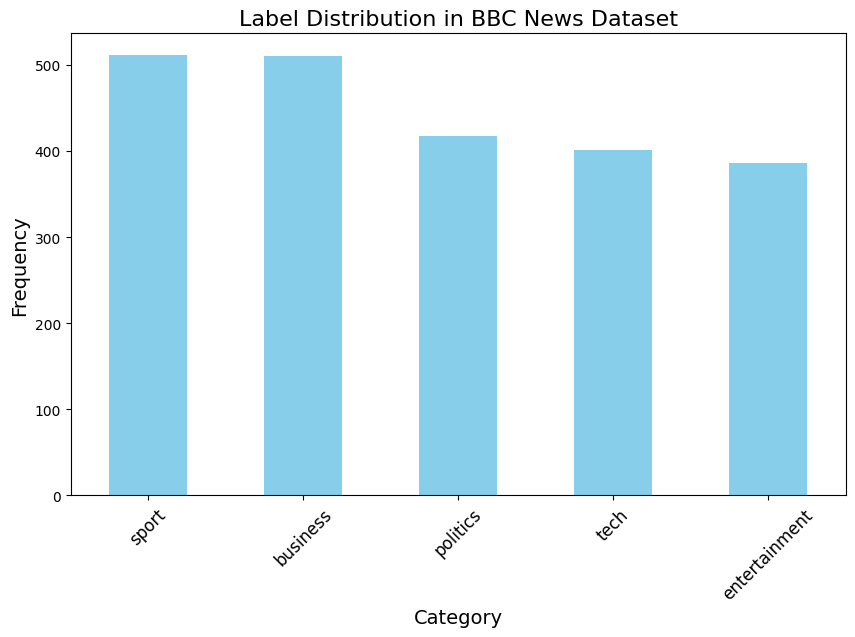

In [4]:
# Plot the label distribution as a bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title("Label Distribution in BBC News Dataset", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


Percentage Distribution:
labels
sport            22.966292
business         22.921348
politics         18.741573
tech             18.022472
entertainment    17.348315
Name: count, dtype: float64


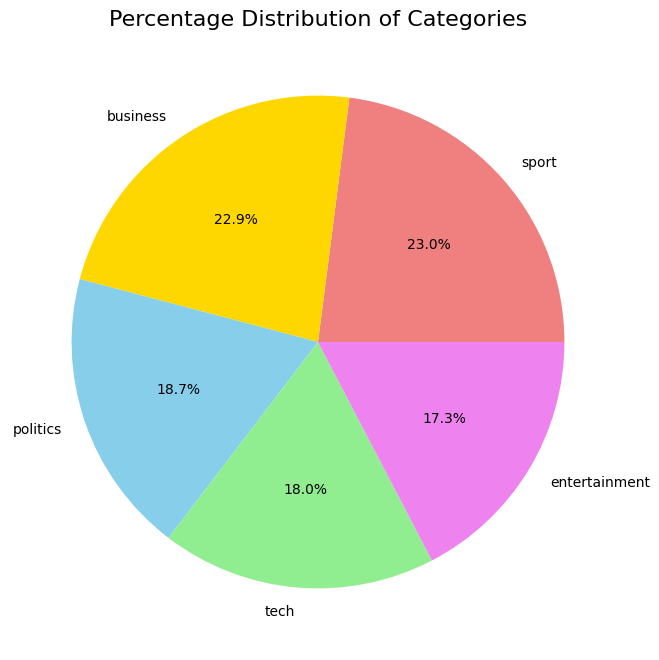

In [5]:
# Calculate percentage distribution
label_percentage = label_counts / len(df) * 100

# Display percentage distribution
print("\nPercentage Distribution:")
print(label_percentage)

# Plot the percentage distribution as a pie chart
plt.figure(figsize=(8, 8))
label_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'gold', 'skyblue', 'lightgreen', 'violet'])
plt.title("Percentage Distribution of Categories", fontsize=16)
plt.ylabel("")  # Remove y-axis label for better visualization
plt.show()

### Word Cloud and Frequency

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


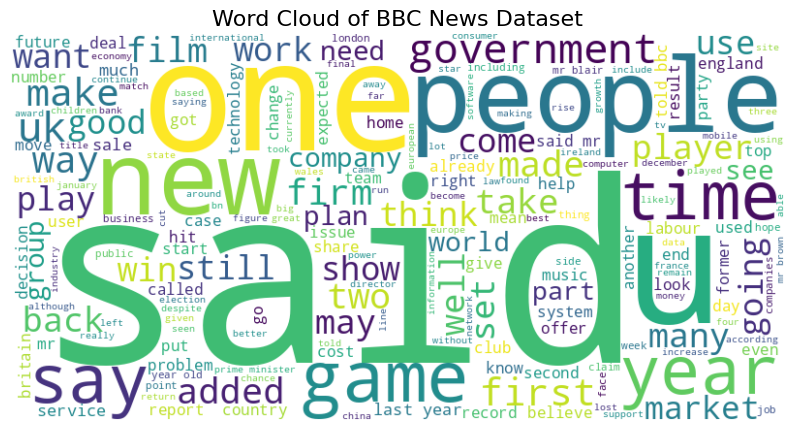

In [6]:
import re   # for
import nltk # for stop words and stemming
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Combine all text into a single corpus
text_corpus = " ".join(df['text'].astype(str).tolist())

# Tokenize and clean the text
stop_words = set(stopwords.words('english'))
# replace any non-alphabet characters by a space
cleaned_text = re.sub('[^a-zA-Z]', ' ', text_corpus)
# replace uppercase characters to lowercase characters
cleaned_text = cleaned_text.lower()
# split text into words
tokens = cleaned_text.split()

cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(cleaned_tokens))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of BBC News Dataset", fontsize=16)
plt.show()

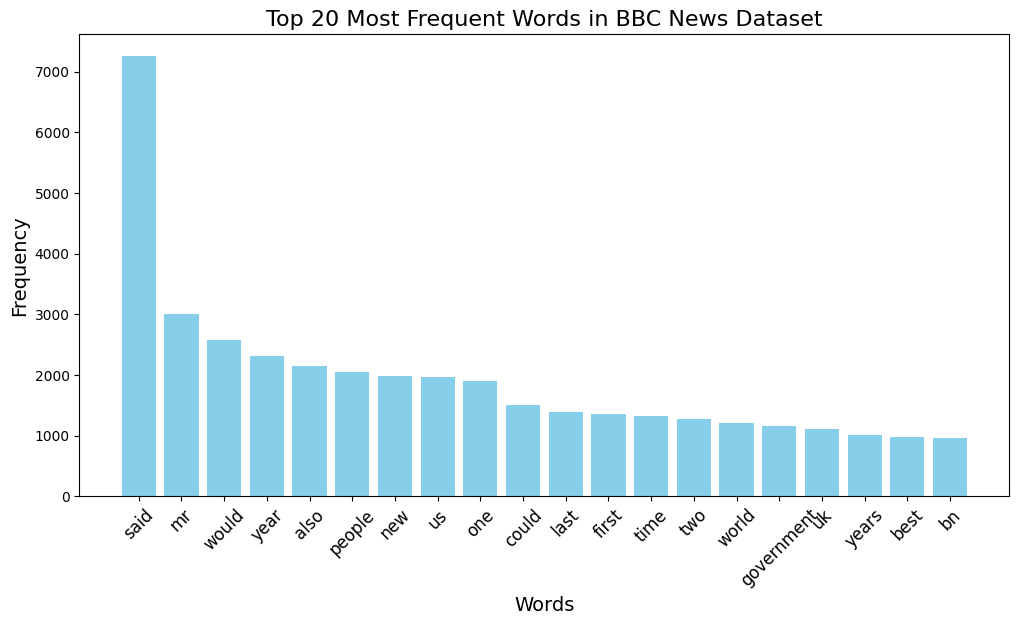

In [7]:
from collections import Counter

# Calculate word frequencies
word_freq = Counter(cleaned_tokens)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Convert to DataFrame for visualization
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(12, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.title("Top 20 Most Frequent Words in BBC News Dataset", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Article Length Analysis

Summary Statistics for Article Lengths:
count    2225.000000
mean      384.040449
std       238.174497
min        89.000000
25%       246.000000
50%       332.000000
75%       471.000000
max      4432.000000
Name: article_length, dtype: float64


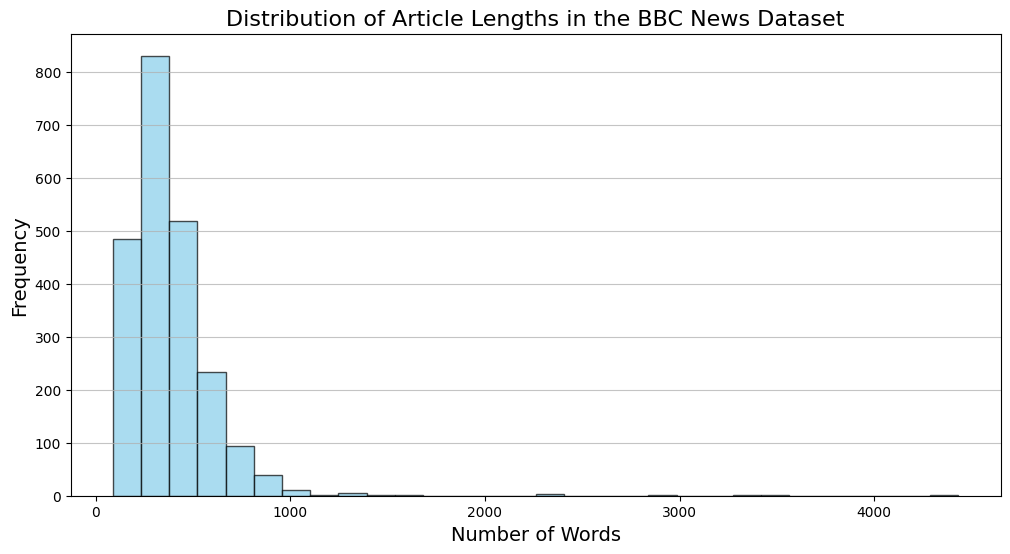

In [8]:
# Add a column for article length (number of words in each article)
df['article_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

# Summary statistics for article length
length_summary = df['article_length'].describe()

# Print summary statistics
print("Summary Statistics for Article Lengths:")
print(length_summary)

# Plot the distribution of article lengths
plt.figure(figsize=(12, 6))
plt.hist(df['article_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Article Lengths in the BBC News Dataset", fontsize=16)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Data Collection and Preprocessing
* Text Cleaning: Remove unnecessary punctuation, special characters, numbers, and stop words.
* Tokenization: Split articles into words/tokens for further processing.
* Lemmatization/Stemming: Convert words to their base or root form to improve consistency across the dataset.

In [9]:
import re   # for cleaning
import nltk # for stop words and stemming
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # for stemming

# Stop words = words not relevant
# Stemming = taking the root word of the word
# Stop words + Stemming = reduces the dimension of the sparse matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def stop_words():
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')

  return all_stopwords

In [11]:
def clean_stem_text(text):
  # replace any non-alphabet characters by a space
  cleaned_text = re.sub('[^a-zA-Z]', ' ', text)

  # replace uppercase characters to lowercase characters
  cleaned_text = cleaned_text.lower()

  # split text into words
  tokens = cleaned_text.split()

  # stem each words of each article text
  ps = PorterStemmer()
  all_stopwords = stop_words()
  stemmed_text = [ps.stem(word) for word in tokens
                  if not word in set(all_stopwords)]
  # join the words together to become a single text separated by a space
  stemmed_text = ' '.join(stemmed_text)

  return stemmed_text

In [12]:
# list of cleaned article text
corpus = []
for i in range(len(df)):
  text = df['text'][i]
  cleaned_text = clean_stem_text(text)

  # add the cleaned article text to the corpus
  corpus.append(cleaned_text)

  # add the cleaned text as a new column to the data frame
  df.loc[i, "cleaned_text"] = cleaned_text
  df.loc[i, "cleaned_text_length"] = len(cleaned_text.split())

In [13]:
corpus[0:2]

['ad sale boost time warner profit quarterli profit us media giant timewarn jump bn three month decemb year earlier firm one biggest investor googl benefit sale high speed internet connect higher advert sale timewarn said fourth quarter sale rose bn bn profit buoy one gain offset profit dip warner bro less user aol time warner said friday own search engin googl internet busi aol mix fortun lost subscrib fourth quarter profit lower preced three quarter howev compani said aol underli profit except item rose back stronger internet advertis revenu hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol exist custom high speed broadband timewarn also restat result follow probe us secur exchang commiss sec close conclud time warner fourth quarter profit slightli better analyst expect film divis saw profit slump help box offic flop alexand catwoman sharp contrast year earlier third final film lord ring trilog boost result full year timewarn post profit bn perform r

In [14]:
df.head(2)

,text,labels,article_length,cleaned_text,cleaned_text_length
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business,421,ad sale boost time warner profit quarterli profit us media giant timewarn jump bn three month decemb year earlier firm one biggest investor googl benefit sale high speed internet connect higher advert sale timewarn said fourth quarter sale rose bn bn profit buoy one gain offset profit dip warner bro less user aol time warner said friday own search engin googl internet busi aol mix fortun lost subscrib fourth quarter profit lower preced three quarter howev compani said aol underli profit except item rose back stronger internet advertis revenu hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol exist custom high speed broadband timewarn also restat result follow probe us secur exchang commiss sec close conclud time warner fourth quarter profit slightli better analyst expect film divis saw profit slump help box offic flop alexand catwoman sharp contrast year earlier third final film lord ring trilog boost result full year timewarn post profit bn perform revenu grew bn financi perform strong meet exceed full year object greatli enhanc flexibl chairman chief execut richard parson said timewarn project oper earn growth around also expect higher revenu wider profit margin timewarn restat account part effort resolv inquiri aol us market regul alreadi offer pay settl charg deal review sec compani said unabl

## Feature Selection
Reduce dimensionality of the data and retain the most informative features, improving model efficiency and performance. We will use the following techniques for feature selection:
* Correlation analysis
* ANOVA tests

### Correlation Analysis
Correlation analysis can help identify the most informative features by analyzing the relationship between each word (feature) and the target variable (categories such as politics, sports, business).

* Feature-Feature Correlation: Identify highly correlated words (features) and remove one from each pair. High correlation between features can indicate redundancy, so removing one can simplify the model without losing information.
* Feature-Target Correlation: This is useful in binary classification but less direct in multi-class classification. In this case, you might compute correlations for each category individually by creating binary labels (one-vs-all approach).

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

max_features = 1000
correlation_coefficient = 0.8

texts = df["cleaned_text"]
labels = df["labels"]

countVectorizer = CountVectorizer(max_features = max_features)
tfidfVectorizer = TfidfVectorizer(max_features = max_features)

In [16]:
def highly_correlated_features(vectorizer, texts):
  # Convert text to features
  X = vectorizer.fit_transform(texts).toarray()
  feature_names = vectorizer.get_feature_names_out()
  df_vectorizer = pd.DataFrame(X, columns=feature_names)

  # Calculate correlation matrix and identify highly correlated features
  correlation_matrix = df_vectorizer.corr().abs()
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
  high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_coefficient)]

  return correlation_matrix, upper_triangle, high_corr_features

In [17]:
correlation_matrix, upper_triangle, high_corr_features = highly_correlated_features(countVectorizer, texts)
print("Highly correlated features to consider removing:", high_corr_features)

Highly correlated features to consider removing: ['lib', 'liber', 'silk', 'song', 'ukip']


In [18]:
upper_triangle[upper_triangle["silk"] > 0.8]

,abl,accept,access,accord,account,accus,achiev,across,act,action,...,worri,worth,would,write,wrong,year,yet,york,young,yuko
kilroy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049683,0.009706,0.064775,0.047051,0.085494,0.020169,0.001074,0.010455,0.01082,0.004664


In [19]:
correlation_matrix, c, high_corr_features = highly_correlated_features(tfidfVectorizer, texts)
print("Highly correlated features to consider removing:", high_corr_features)

Highly correlated features to consider removing: ['lib', 'silk']


### ANOVA tests
ANOVA is useful when you have a categorical target and want to determine if specific features (words) have significantly different distributions across news categories.

* When to Use: ANOVA is best suited if your feature vectors represent continuous numerical values, like TF-IDF scores or embeddings.
* One-Way ANOVA for Multi-Class Classification: For each feature, ANOVA tests if the mean values differ significantly across categories (e.g., sports vs. politics). Features with significant p-values (e.g., < 0.05) are likely to be useful for classification.

In [20]:
from sklearn.feature_selection import f_classif
# Target labels need to be numeric for ANOVA
from sklearn.preprocessing import LabelEncoder

def get_selected_features(vectorizer, texts, labels):
  # Convert text to features
  X = vectorizer.fit_transform(texts).toarray()
  feature_names = vectorizer.get_feature_names_out()
  df_vectorizer = pd.DataFrame(X, columns=feature_names)

  le = LabelEncoder()
  y = le.fit_transform(labels)

  # Perform ANOVA F-test
  f_values, p_values = f_classif(df_vectorizer, y)

  # Select features with p-values less than 0.05
  selected_features = df_vectorizer.columns[p_values < 0.05].tolist()

  return selected_features

In [21]:
selected_features = get_selected_features(countVectorizer, texts, labels)

print("Selected features based on ANOVA using counts:", selected_features)
print("Number of selected features based on ANOVA using counts:", len(selected_features))

Selected features based on ANOVA using counts: ['abl', 'accept', 'access', 'accord', 'account', 'accus', 'achiev', 'across', 'act', 'action', 'activ', 'actor', 'actress', 'actual', 'ad', 'add', 'address', 'admit', 'affair', 'affect', 'africa', 'age', 'agenc', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airlin', 'alan', 'album', 'alleg', 'allow', 'almost', 'alreadi', 'also', 'although', 'alway', 'america', 'american', 'among', 'amount', 'analyst', 'andi', 'angel', 'announc', 'annual', 'anoth', 'answer', 'anti', 'anyon', 'anyth', 'appeal', 'appear', 'appl', 'approach', 'approv', 'area', 'argu', 'around', 'arrest', 'arsen', 'artist', 'ask', 'associ', 'athlet', 'attack', 'attempt', 'attend', 'audienc', 'australia', 'australian', 'author', 'avail', 'averag', 'aviat', 'avoid', 'award', 'away', 'back', 'ball', 'ban', 'band', 'bank', 'base', 'bbc', 'beat', 'becam', 'becom', 'behind', 'believ', 'benefit', 'best', 'better', 'bid', 'big', 'biggest', 'bill', 'billion', 'bit', 'black', 'bla

In [22]:
selected_features = get_selected_features(tfidfVectorizer, texts, labels)

print("Selected features based on ANOVA using tfidf:", selected_features)
print("Number of selected features based on ANOVA using tfidf:", len(selected_features))

Selected features based on ANOVA using tfidf: ['abl', 'accept', 'access', 'accord', 'account', 'accus', 'achiev', 'across', 'act', 'activ', 'actor', 'actress', 'actual', 'ad', 'add', 'address', 'admit', 'affair', 'affect', 'africa', 'age', 'agenc', 'ago', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airlin', 'alan', 'album', 'alleg', 'allow', 'almost', 'alreadi', 'also', 'although', 'alway', 'america', 'american', 'among', 'amount', 'analyst', 'andi', 'angel', 'announc', 'annual', 'anoth', 'answer', 'anti', 'anyon', 'anyth', 'appeal', 'appear', 'appl', 'approach', 'approv', 'april', 'area', 'argu', 'around', 'arrest', 'arsen', 'artist', 'ask', 'athlet', 'attack', 'attend', 'audienc', 'australia', 'australian', 'author', 'avail', 'averag', 'aviat', 'avoid', 'award', 'away', 'back', 'ball', 'ban', 'band', 'bank', 'base', 'battl', 'bbc', 'beat', 'becam', 'becom', 'behind', 'believ', 'benefit', 'best', 'better', 'bid', 'big', 'biggest', 'bill', 'billion', 'bit', 'black', 'blair', 'b